In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
np.random.seed(0)

In [3]:
data = pd.read_csv('data.csv',header = None)
data.shape
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.71,0.55,0.8,0.80,0.80,0.80,0.80,0.800,0.80,0.78,0.80,0.80,0.72,0.65,0.52,0.50,0.71
1,0.78,0.55,0.8,0.72,0.76,0.78,0.74,0.750,0.72,0.76,0.73,0.60,0.72,0.63,0.49,0.48,0.78
2,0.52,0.62,0.8,0.69,0.74,0.75,0.76,0.780,0.75,0.75,0.67,0.80,0.80,0.62,0.48,0.32,0.52
3,0.71,0.55,0.8,0.74,0.78,0.76,0.71,0.690,0.69,0.73,0.70,0.80,0.60,0.61,0.48,0.36,0.71
4,0.59,0.45,0.8,0.77,0.80,0.80,0.79,0.800,0.80,0.80,0.80,0.30,0.72,0.64,0.51,0.63,0.59
5,0.52,0.52,0.8,0.65,0.69,0.71,0.67,0.690,0.78,0.69,0.62,0.80,0.72,0.59,0.46,0.52,0.52
6,0.31,0.45,0.8,0.59,0.56,0.54,0.62,0.610,0.62,0.59,0.58,0.80,0.60,0.54,0.45,0.38,0.31
7,0.55,0.45,0.8,0.56,0.61,0.64,0.55,0.670,0.63,0.61,0.50,0.77,0.72,0.48,0.43,0.25,0.55
8,0.44,0.55,0.8,0.59,0.58,0.61,0.62,0.650,0.62,0.66,0.63,0.80,0.20,0.58,0.48,0.32,0.44
9,0.53,0.45,0.8,0.57,0.61,0.55,0.62,0.620,0.40,0.62,0.62,0.80,0.72,0.57,0.49,0.31,0.53


In [4]:
city = ['shenzhen','hangzhou','shanghai','beijing','guangzhou','ningbo','nanjing','foshan','xiamen','chengdu','suzhou','qingdao',
               'chongqing','wuhan','wuxi','xian','tianjin','fuzhou','wenzhou','jinan','shenyang','changzhou','xuzhou','yichang','yangzhou']
indicator = ['Communication network construction','Network resource connection','Urban cloud platform construction','Legitimacy of information content','Authenticity of information content','Controllability of information content','Safety education and Training','Safety knowledge promotion','Public safety consciousness','Data encryption and recovery','Data backup technology','Data opening service level','R&d spending','Firewall reliability','Operating system security','Vulnerability threat repair rate']
dictionary = {'Communication network construction':'通信网络建设','Network resource connection':'网络链接','Urban cloud platform construction':'城市云平台建设',
          'Legitimacy of information content':'信息内容的合法性','Authenticity of information content':'信息内容的真实性','Controllability of information content':'信息内容的可控性',
          'Safety education and Training':'教育安全与培训','Safety knowledge promotion':'安全知识宣传','Public safety consciousness':'公众安全意识',
          'Data encryption and recovery':'数据加密与恢复','Data backup technology':'数据备份技术','Data opening service level':'数据开放服务水平',
          'R&d spending':'研发投入','Firewall reliability':'防火墙可靠性','Operating system security':'操作系统安全性','Vulnerability threat repair rate':'漏洞威胁修复率'}

In [5]:
# Determine the parameter of random forest (n_estimators)
list_r2 = []
list_mse = []
for estimators in tqdm(range(1,51)):
    total_r2 = []
    total_mse = []
    for i in range(0,16):
        x = data[set(list(range(16)))-set({i})]
        y = data[i]
        clf = RandomForestRegressor(n_estimators=estimators, max_depth=None,min_samples_split=2, random_state=0)
        clf.fit(x,y)
        pred = clf.predict(x)
        r2 = sum((pred-np.mean(y))**2)/sum((y-np.mean(y))**2)  
        mse = sum((pred-y)**2)
        total_r2.append(r2)
        total_mse.append(mse)
    list_r2.append(sum(total_r2))
    list_mse.append(sum(total_mse))

100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


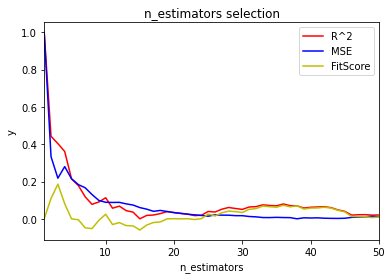

In [6]:
# The smaller mse is, the better it is; the larger R^2 is, the better it is; and their ranges are different. 
# Here, the difference is unified to [0,1] and then the x selection parameter corresponding to the maximum difference is used.
list_r2 = np.array(list_r2)
list_mse = np.array(list_mse)
list_r2 = (list_r2-list_r2.min())/(list_r2.max()-list_r2.min())
list_mse = (list_mse-list_mse.min())/(list_mse.max()-list_mse.min())
list_total = list(list_r2-list_mse)
plt.plot(range(1,51),list_r2,'r',range(1,51),list_mse,'b',range(1,51),list_total,'y')
plt.xlim([1,50])
plt.legend(['R^2','MSE','FitScore'])
plt.xlabel('n_estimators')
plt.ylabel('y')
plt.title('n_estimators selection')
plt.savefig('figure1.jpg',dpi=300)

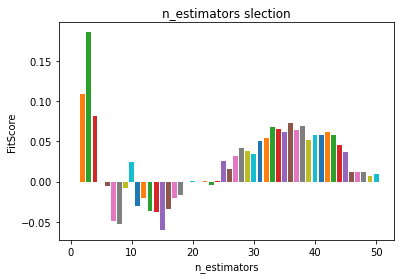

In [7]:
for i in range(1,51):
    plt.bar(i,list_total[i-1])
plt.xlabel('n_estimators')
plt.ylabel('FitScore')
plt.title('n_estimators slection')
plt.savefig('figure1a.jpg',dpi=300)

In [8]:
# Select the parameter n_estimators (here is 3) corresponding to the maximum R^2-MSE and construct the relation matrix.
interaction = [] # relation matrix
for i in range(0,16):
    x = data[set(list(range(16)))-set({i})]
    y = data[i]
    clf = RandomForestRegressor(n_estimators=list_total.index(max(list_total))+1, max_depth=None,min_samples_split=2, random_state=0)
    clf.fit(x,y)
    interaction_i = list(clf.feature_importances_)
    interaction_i.insert(i,0)
    interaction.append(interaction_i)

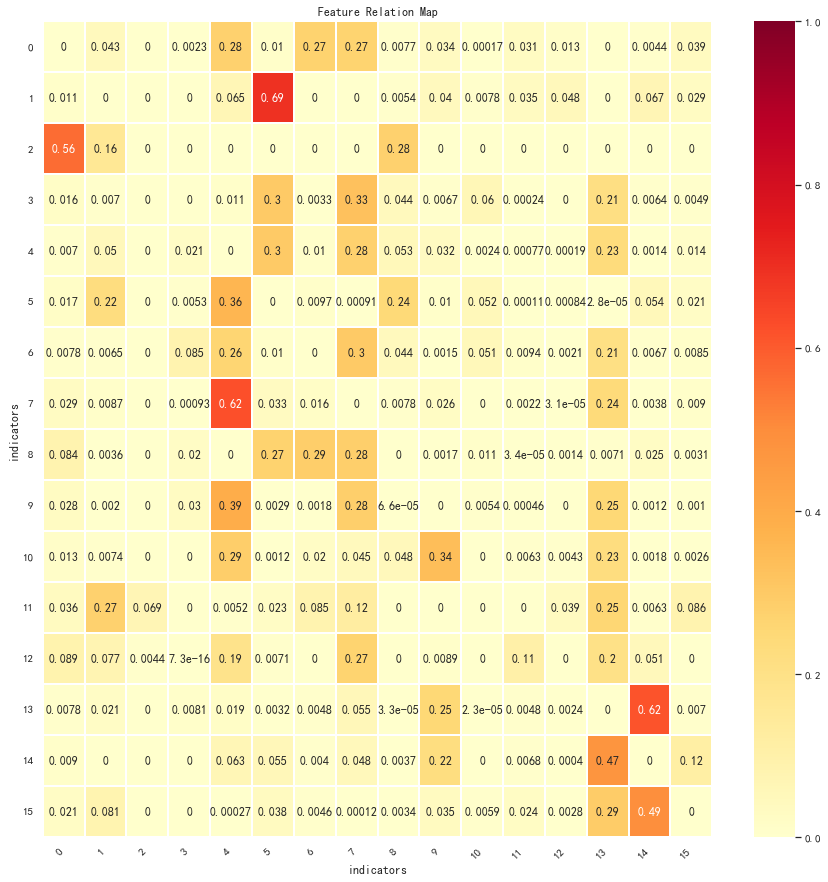

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
plt.rcParams['font.sans-serif']='SimHei'
np.random.seed(0)
uniform_data = np.array(interaction)
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(uniform_data, ax=ax,vmin=0,vmax=1,cmap='YlOrRd',annot=True,linewidths=2,cbar=True)
ax.set_title('Feature Relation Map')
ax.set_ylabel('indicators') 
ax.set_xlabel('indicators') 
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.savefig('feature_mapping.jpg',dpi=600)
pd.DataFrame(interaction).to_excel("Supplementary material 2.xlsx")

In [10]:
node = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

In [11]:
file = []
for row,x in enumerate(interaction):
    for col,y in enumerate(x):
        file.append([node[col],node[row],y]) 

In [12]:
file_csv = pd.DataFrame(data=file,columns=["o","t","v"])
file_csv
file_csv.to_csv('network.csv')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.estimators_[0])
fig.savefig('decistion_tree_1.jpg',dpi=300)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.estimators_[1])
fig.savefig('decistion_tree_2.jpg',dpi=300)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.estimators_[2])
fig.savefig('decistion_tree_3.jpg',dpi=300)

In [13]:
# Spectral clustering
def SpectralCluster(Similarity,k):
    np.random.seed(0)
    # 1.Calculate the Laplacian
    degreeMatrix = np.sum(Similarity, axis=1)   # Degree vector: D=sum(A)
    laplacianMatrix = np.diag(degreeMatrix) - Similarity  # Laplacian: L=D-A
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))  #  D^(-1/2)*L*D^(-1/2)
    Laplacian = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    # 2.eig
    eig, Vector = np.linalg.eig(Laplacian)
    eig = abs(eig) 
    Vector = abs(Vector)
    eig = zip(eig, range(len(eig)))
    eig = sorted(eig, key=lambda eig:eig[0])
    # 3.Kmeans
    H = np.vstack([Vector[:,i] for (v, i) in eig[:]]).T
    sp_kmeans = KMeans(n_clusters=k,random_state=0).fit(H)
    return sp_kmeans

In [14]:
k = 4
sp_kmeans = SpectralCluster((np.array(interaction)+np.array(interaction).T)/2,k)

In [15]:
clusters = []
for i in range(k):
    cluster = list(np.where(sp_kmeans.labels_ == i)[0])
    clusters.append(cluster)

In [33]:
clusters_name = []
for cluster in clusters:
    cluster_name = []
    for i in cluster:
        cluster_name.append(indicator[i])
    clusters_name.append(cluster_name)
clusters_name

[['Firewall reliability',
  'Operating system security',
  'Vulnerability threat repair rate'],
 ['Communication network construction',
  'Network resource connection',
  'Urban cloud platform construction',
  'Controllability of information content'],
 ['Legitimacy of information content',
  'Safety education and Training',
  'Public safety consciousness',
  'R&d spending'],
 ['Authenticity of information content',
  'Safety knowledge promotion',
  'Data encryption and recovery',
  'Data backup technology',
  'Data opening service level']]

In [17]:
# PageRank
def PageRank(init_s, Q, alpha):
    # init_s: 初始概率向量
    # Q: 转移概率矩阵
    # alpha: 重启概率
    
    # 归一化输入
    init_s = init_s/sum(init_s)    
    Q = list(Q)
    for i in range(len(init_s)):
        Q[i] = Q[i]/sum(Q[i])
    Q = np.array(Q)
    
    epsilon = 1
    while epsilon > 10e-9:
        next_s = (1-alpha)*np.dot(init_s, Q)+alpha*init_s
        epsilon = np.sqrt(np.sum(np.square(next_s - init_s)))
        init_s = next_s
    return init_s

In [18]:
def Run_PageRank(Q,alpha = 0, flag = False):
    np.random.seed(0)
    init_s = np.random.random(Q.shape[0])  # Initial vector
    Stationary = PageRank(init_s, Q, alpha)
    if flag:
        for i in range(Q.shape[0]):
            plt.bar(i,Stationary[i])
        plt.xlabel('indicator')
        plt.ylabel('indicator_importances')
        plt.title('PageRank')
    return Stationary

Operating system security
Public safety consciousness
Authenticity of information content
Controllability of information content


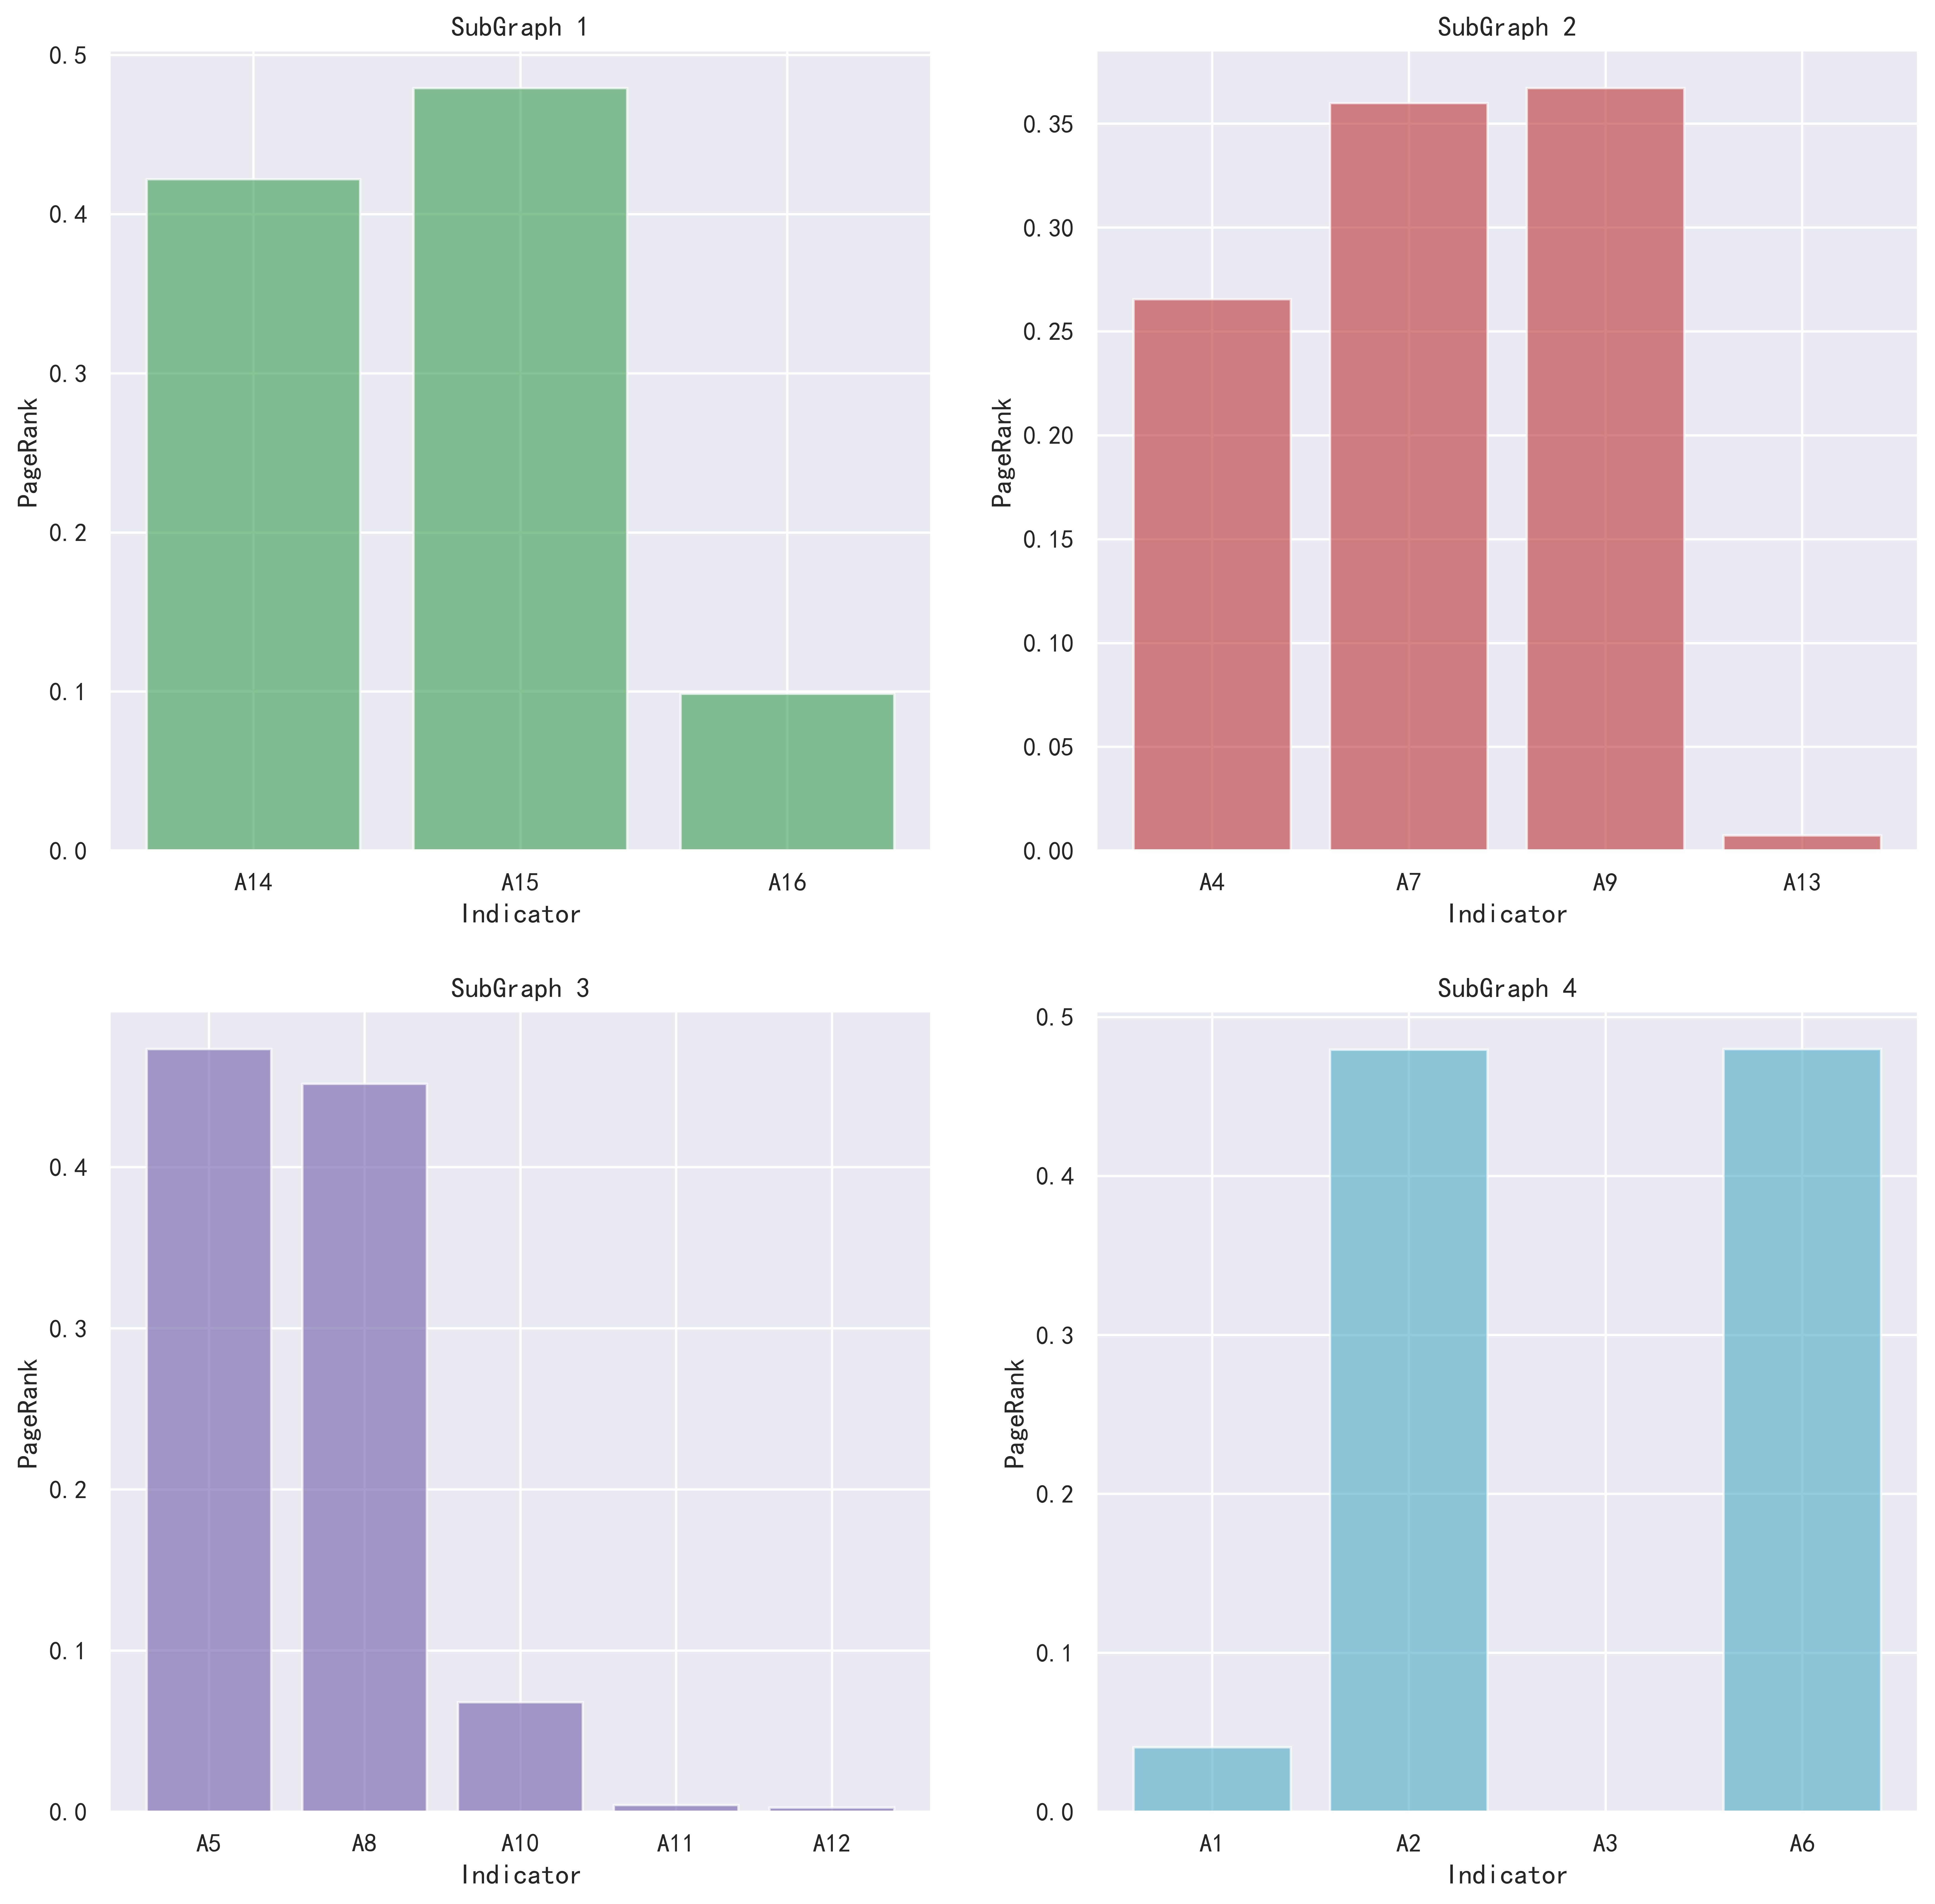

In [34]:
l = [0,2,3,1]
cc = []
for i in l:
    cc.append(clusters[i])
clusters = cc
plt.figure(figsize=(14,14),dpi=600)
pic = 1
colors=['g','r','m','c']
inter_arr = np.array(interaction)
cluster_center = []
Stationarys = []
for cluster in clusters:
    sub_interaction = inter_arr[cluster]
    sub_interaction = sub_interaction[:,cluster]
    Stationary = Run_PageRank(sub_interaction)
    list_Stationary = list(Stationary)
    Stationarys.append(list_Stationary)
    get_first = list_Stationary.index(max(list_Stationary))
    cluster_center.append(cluster[get_first])
    plt.subplot(2,2,pic)
    cluster_name = ["A"+str(x+1) for x in cluster]
    plt.bar(cluster_name,list_Stationary,color=colors[pic-1],alpha=0.7)
    plt.ylabel("PageRank")
    plt.xlabel("Indicator")
    plt.title("SubGraph "+str(pic))
    pic = pic+1
for i in cluster_center:
    print(indicator[i])
plt.savefig("PageRank_pic.jpg",dpi=600)

In [20]:
# build the two-level indicator
new_data = np.array(data).T
new_X = []
for i,cluster in enumerate(clusters):
    weights = Stationarys[i]
    cmp = np.zeros(25)
    for j,ind in enumerate(cluster):
            cmp = cmp + (1-weights[j])*new_data[ind]
    new_X.append(list(cmp))
new_X = np.array(new_X).T

In [21]:
# data pre-processing
old_X = np.array(data)[:,:-1]
Y = np.array(data)[:,0]

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import  MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.model_selection import cross_val_score

In [564]:
total_rs1 = []
total_ms1 = []
total_rs = []
total_ms = []

# 1.Ridge

In [602]:
ms1=[]
rs1=[]
for alpha in np.linspace(0,1,100):
    regr = linear_model.Ridge(alpha=alpha,random_state=0)
    regr.fit(old_X, Y)
    Y_pred = regr.predict(old_X)
    ms1.append(mean_squared_error(Y, Y_pred))
    rs1.append(r2_score(Y,Y_pred))
    
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error:" +str(sum(ms1)/len(ms1)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs1)/len(rs1)))
total_rs1.append(sum(rs1)/len(rs1))
total_ms1.append(sum(ms1)/len(ms1))

Coefficients: 
 [ 0.32834827  0.03810916  0.03274788  0.0542384   0.07645291  0.03901126
  0.05001174  0.03122171 -0.00268164  0.04084227  0.04875598 -0.00248477
  0.0481278   0.06025767  0.0665965   0.00058764]
Mean squared error:0.00410236601062646
Coefficient of determination:0.892438824844927


In [603]:
ms=[]
rs=[]
for alpha in np.linspace(0,1,100):
    regr = linear_model.Ridge(alpha=alpha,random_state=0)
    regr.fit(new_X, Y)
    Y_pred = regr.predict(new_X)
    ms.append(mean_squared_error(Y, Y_pred))
    rs.append(r2_score(Y,Y_pred))
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error:" +str(sum(ms)/len(ms)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs)/len(rs)))
total_rs.append(sum(rs)/len(rs))
total_ms.append(sum(ms)/len(ms))

Coefficients: 
 [0.05868884 0.27698977 0.04124458 0.03602342]
Mean squared error:0.008583874303836104
Coefficient of determination:0.7749368035147473


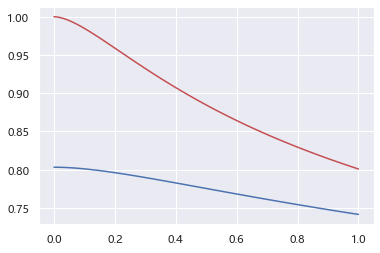

In [569]:
plt.plot(np.linspace(0,1,100),rs1,'r',np.linspace(0,1,100),rs,'b')

# 2.lasso

In [608]:
ms1=[]
rs1=[]
for alpha in np.linspace(0.1,1,100):
    regr = linear_model.Lasso(alpha=alpha,random_state=0)
    regr.fit(old_X, Y)
    Y_pred = regr.predict(old_X)
    ms1.append(mean_squared_error(Y, Y_pred))
    rs1.append(r2_score(Y,Y_pred))
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error:" +str(sum(ms1)/len(ms1)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs1)/len(rs1)))
total_rs1.append(sum(rs1)/len(rs1))
total_ms1.append(sum(ms1)/len(ms1))

Coefficients: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean squared error:0.03813983999999995
Coefficient of determination:0.0


In [572]:
ms=[]
rs=[]
for alpha in np.linspace(0,1,100):
    regr = linear_model.Lasso(alpha=alpha,random_state=0)
    regr.fit(new_X, Y)
    Y_pred = regr.predict(new_X)
    ms.append(mean_squared_error(Y, Y_pred))
    rs.append(r2_score(Y,Y_pred))
# The mean squared error
print("Mean squared error:" +str(sum(ms)/len(ms)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs)/len(rs)))
total_rs.append(sum(rs)/len(rs))
total_ms.append(sum(ms)/len(ms))

Mean squared error:0.036654680074531404
Coefficient of determination:0.038939857258670905


C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.380e-02, tolerance: 9.535e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Rid

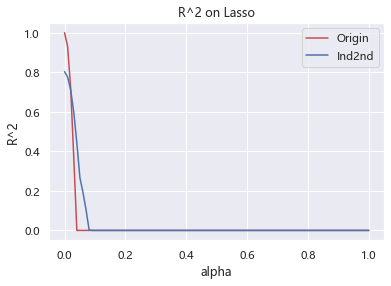

In [574]:
plt.plot(np.linspace(0,1,100),rs1,'r',np.linspace(0,1,100),rs,'b')
plt.ylabel("R^2")
plt.xlabel("alpha")
plt.title("R^2 on Lasso")
plt.legend(["Origin","Ind2nd"])  
plt.savefig('r2 on lasso.jpg',dpi=450)

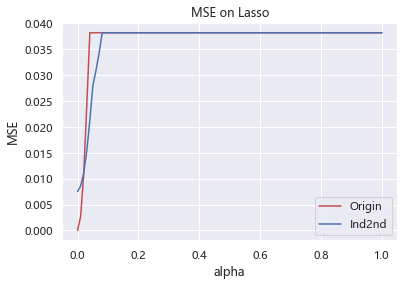

In [575]:
plt.plot(np.linspace(0,1,100),ms1,'r',np.linspace(0,1,100),ms,'b')
plt.ylabel("MSE")
plt.xlabel("alpha")
plt.title("MSE on Lasso")
plt.legend(["Origin","Ind2nd"])  
plt.savefig('MSE on Lasso.jpg',dpi=450)

### 3.SVR

In [578]:
regr = svm.SVR()
regr.fit(old_X, Y)
Y_pred = regr.predict(old_X)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y,Y_pred))
total_rs1.append(r2_score(Y,Y_pred))
total_ms1.append(mean_squared_error(Y, Y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.84


In [579]:
regr = svm.SVR()
regr.fit(new_X, Y)
Y_pred = regr.predict(new_X)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y,Y_pred))
total_rs.append(r2_score(Y,Y_pred))
total_ms.append(mean_squared_error(Y, Y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.85


# 4.Dtree

In [581]:
ms1=[]
rs1=[]
for i in range(50):
    regr = tree.DecisionTreeRegressor()
    regr.fit(old_X, Y)
    Y_pred = regr.predict(old_X)
    ms1.append(mean_squared_error(Y, Y_pred))
    rs1.append(r2_score(Y,Y_pred))
# The mean squared error
print("Mean squared error:" +str(sum(ms1)/len(ms1)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs1)/len(rs1)))
total_rs1.append(sum(rs1)/len(rs1))
total_ms1.append(sum(ms1)/len(ms1))

Mean squared error:0.0
Coefficient of determination:1.0


In [582]:
ms=[]
rs=[]
for i in range(50):
    regr = tree.DecisionTreeRegressor()
    regr.fit(new_X, Y)
    Y_pred = regr.predict(new_X)
    ms.append(mean_squared_error(Y, Y_pred))
    rs.append(r2_score(Y,Y_pred))
# The mean squared error
print("Mean squared error:" +str(sum(ms)/len(ms)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs)/len(rs)))
total_rs.append(sum(rs)/len(rs))
total_ms.append(sum(ms)/len(ms))

Mean squared error:0.0
Coefficient of determination:1.0


# 5.MLP

In [595]:
ms1=[]
rs1=[]
for alpha in np.linspace(0.1,1,100):
    regr = MLPRegressor(alpha=alpha,random_state=0)
    regr.fit(old_X, Y)
    Y_pred = regr.predict(old_X)
    ms1.append(mean_squared_error(Y, Y_pred))
    rs1.append(r2_score(Y,Y_pred))
# The mean squared error
print("Mean squared error:" +str(sum(ms1)/len(ms1)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs1)/len(rs1)))
total_rs1.append(sum(rs1)/len(rs1))
total_ms1.append(sum(ms1)/len(ms1))

C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged

C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged

Mean squared error:0.03331900555745617
Coefficient of determination:0.12639891626561156


C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [596]:
ms=[]
rs=[]
for alpha in np.linspace(0.1,1,100):
    regr = MLPRegressor(alpha=alpha,random_state=0)
    regr.fit(new_X, Y)
    Y_pred = regr.predict(new_X)
    ms.append(mean_squared_error(Y, Y_pred))
    rs.append(r2_score(Y,Y_pred))
# The mean squared error
print("Mean squared error:" +str(sum(ms)/len(ms)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:"+str(sum(rs)/len(rs)))
total_rs.append(sum(rs)/len(rs))
total_ms.append(sum(ms)/len(ms))

C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged

C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Mean squared error:0.021489584915984575
Coefficient of determination:0.4365580737626435


C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Damon\.conda\envs\pytorch37_cuda113\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


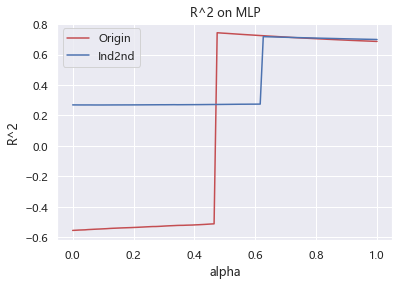

In [597]:
plt.plot(np.linspace(0,1,100),rs1,'r',np.linspace(0,1,100),rs,'b')
plt.ylabel("R^2")
plt.xlabel("alpha")
plt.title("R^2 on MLP")
plt.legend(["Origin","Ind2nd"])  # 给出图例
plt.savefig('r2 on mlp.jpg',dpi=450)

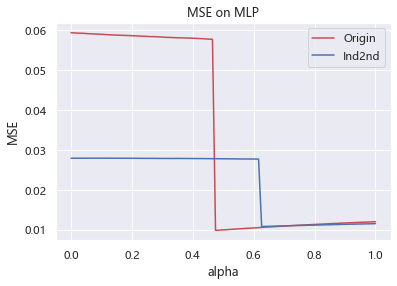

In [598]:
plt.plot(np.linspace(0,1,100),ms1,'r',np.linspace(0,1,100),ms,'b')
plt.ylabel("MSE")
plt.xlabel("alpha")
plt.title("MSE on MLP")
plt.legend(["Origin","Ind2nd"])  # 给出图例
plt.savefig('MSE on mlp.jpg',dpi=450)

In [600]:
max_v = max(rs1)
max_I = rs1.index(max_v)
max_v,np.linspace(0.1,1,100)[max_I]

(0.7431146128087178, 0.5272727272727272)

In [601]:
max_v = max(rs)
max_I = rs.index(max_v)
max_v,np.linspace(0.1,1,100)[max_I]

(0.7174588789003356, 0.6636363636363636)

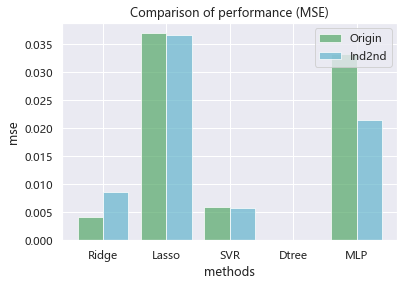

In [591]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def drawHistogram():
    matplotlib.rc("font", family='MicroSoft YaHei')
    # list1 = np.array([0.0134,0.0229,0.06358,0.064835,0.053483,0.091234])  # 柱状图LOOCV--MSE
    # list2 = np.array([0.9849,0.9761,0.91344,0.91078,0.94508,0.91431]) # 柱状图LOOCV--R2

    list1 = np.array(total_ms1)  # 一级--MSE
    list2 = np.array(total_ms) # 二级-MSE

    length = len(list1)
    x = np.arange(length)  # 横坐标范围
    listDate = ["Ridge", "Lasso", "SVR", "Dtree", "MLP"]

    plt.figure()
    total_width, n = 0.8, 2  # 柱状图总宽度，有几组数据
    width = total_width / n  # 单个柱状图的宽度
    x1 = x - width / 2  # 第一组数据柱状图横坐标起始位置
    x2 = x1 + width  # 第二组数据柱状图横坐标起始位置
    # plt.xticks(rotation=315) # 横坐标旋转45度
    plt.title("Comparison of performance (MSE)")  # 柱状图标题
    plt.xlabel("methods")   # 横坐标label 此处可以不添加
    plt.ylabel("mse")  # 纵坐标label
    plt.bar(x1, list1, width=width, label="Origin",color=["g"],alpha=0.7)
    plt.bar(x2, list2, width=width, label="Ind2nd",color=["c"],alpha=0.7)
    plt.xticks(x, listDate)  # 用星期几替换横坐标x的值
    plt.legend()  # 给出图例
#     plt.show()
    plt.savefig('mse.jpg',dpi=450)

if __name__ == '__main__':
    drawHistogram()

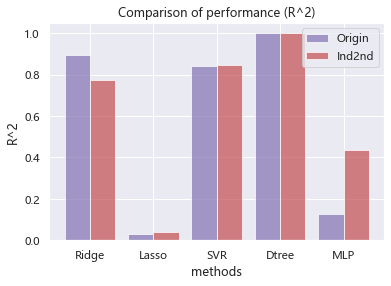

In [592]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def drawHistogram():
    matplotlib.rc("font", family='MicroSoft YaHei')
    # list1 = np.array([0.0134,0.0229,0.06358,0.064835,0.053483,0.091234])  # 柱状图LOOCV--MSE
    # list2 = np.array([0.9849,0.9761,0.91344,0.91078,0.94508,0.91431]) # 柱状图LOOCV--R2

    list1 = np.array(total_rs1)  # 一级--MSE
    list2 = np.array(total_rs) # 二级-MSE

    length = len(list1)
    x = np.arange(length)  # 横坐标范围
    listDate = ["Ridge", "Lasso", "SVR", "Dtree", "MLP"]

    plt.figure()
    total_width, n = 0.8, 2  # 柱状图总宽度，有几组数据
    width = total_width / n  # 单个柱状图的宽度
    x1 = x - width / 2  # 第一组数据柱状图横坐标起始位置
    x2 = x1 + width  # 第二组数据柱状图横坐标起始位置
    # plt.xticks(rotation=315) # 横坐标旋转45度
    plt.title("Comparison of performance (R^2)")  # 柱状图标题
    plt.xlabel("methods")   # 横坐标label 此处可以不添加
    plt.ylabel("R^2")  # 纵坐标label
    plt.bar(x1, list1, width=width, label="Origin",color=['m'],alpha=0.7)
    plt.bar(x2, list2, width=width, label="Ind2nd",color=['r'],alpha=0.7)
    plt.xticks(x, listDate)  # 用星期几替换横坐标x的值
    plt.legend()  # 给出图例
#     plt.show()
    plt.savefig('r2.jpg',dpi=450)

if __name__ == '__main__':
    drawHistogram()